In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
env_data_path = '../data/combined_campaign_env_data.csv'
df = pd.read_csv(env_data_path)
df.head()

,index,filename,date,Frame Width [pixels],Frame Height [pixels],Particle Width [micrometers],Particle Height [micrometers],Cutoff [%],Aggregate [%],Budding [%],...,Altitude [m],Pressure [hPa],Temperature [C],Ice Water Content [g/m3],PSD IWC [g/m3],concentration ratio,area ratio,mass ratio,Campaign,Perimeter [pixels]
0,271,2000_0309_193624_939_28.png,2000-03-09 19:36:24,106.0,140.0,174.632,248.420,0.00,12.598,78.102,...,8847.020703,314.452612,-44.526981,0.020192,0.040985,0.000000,0.000000,0.000000,ARM,NaN
1,6544,2000_0312_235820_253_18.png,2000-03-12 23:58:20,205.0,228.0,405.842,475.640,0.00,0.030,0.000,...,5489.247559,505.781403,-21.561199,0.142520,0.095309,0.000226,0.007562,0.010116,ARM,NaN
2,14959,2000_0313_195433_318_7.png,2000-03-13 19:54:33,232.0,202.0,411.359,441.451,0.00,0.000,0.000,...,8501.253711,330.897675,-44.473520,0.021264,0.024126,0.000000,0.000000,0.000000,ARM,NaN
3,561,2000_0309_200021_189_43.png,2000-03-09 20:00:21,88.0,97.0,137.014,171.312,0.00,0.000,0.002,...,8538.226562,329.106384,-41.710745,0.026756,0.066655,0.000000,0.000000,0.000000,ARM,NaN
4,18005,2000_0313_203846_761_13.png,2000-03-13 20:38:46,275.0,323.0,546.286,653.653,2.26,2.794,0.231,...,7008.998828,410.059528,-31.873159,0.156208,0.101433,0.001189,0.033566,0.050216,ARM,NaN


In [49]:
# check if filename is in alphanumberic ordering
is_sorted = df['filename'].tolist() == sorted(df['filename'], key=lambda x: str(x))
print(f"Filename column is alphanumeric sorted? {is_sorted}")

Filename column is alphanumeric sorted? False


In [56]:
# check if campaign is in alphanumberic ordering
is_sorted = df['Campaign'].tolist() == sorted(df['Campaign'], key=lambda x: str(x))
print(f"Campaign column is alphanumeric sorted? {is_sorted}")

Campaign column is alphanumeric sorted? True


In [3]:
print(df.shape)
print(df.columns)

(759632, 48)
Index(['index', 'filename', 'date', 'Frame Width [pixels]',
       'Frame Height [pixels]', 'Particle Width [micrometers]',
       'Particle Height [micrometers]', 'Cutoff [%]', 'Aggregate [%]',
       'Budding [%]', 'Bullet Rosette [%]', 'Column [%]',
       'Compact Irregular [%]', 'Fragment [%]', 'Planar Polycrystal [%]',
       'Rimed [%]', 'Sphere [%]', 'Classification', 'Blur', 'Contours [#]',
       'Edges', 'Std', 'Contour Area [pixels]', 'Contrast', 'Circularity',
       'Solidity', 'Complexity', 'Equivalent Diameter', 'Convex Perimeter',
       'Hull Area', 'Perimeter', 'Aspect Ratio', 'Extreme Points',
       'Area Ratio', 'Roundness', 'Perimeter-Area Ratio', 'Latitude [degrees]',
       'Longitude [degrees]', 'Altitude [m]', 'Pressure [hPa]',
       'Temperature [C]', 'Ice Water Content [g/m3]', 'PSD IWC [g/m3]',
       'concentration ratio', 'area ratio', 'mass ratio', 'Campaign',
       'Perimeter [pixels]'],
      dtype='object')


In [48]:
# number of unique values in 'index' column?
n_index = len(df['index'].unique())
print(f'There are {n_index} unique values in index column')

There are 396138 unique values in index column


In [4]:
env_vars = ['Latitude [degrees]','Longitude [degrees]', 'Altitude [m]',
'Pressure [hPa]','Temperature [C]', 'Ice Water Content [g/m3]', 
'PSD IWC [g/m3]']

In [5]:
# Print min, max values for all environmental variables
for v in env_vars:
    min = df[v].min()
    max = df[v].max()
    print(f'Min, Max for {v}: {min}, {max}')

Min, Max for Latitude [degrees]: -999.99, 71.72797393798828
Min, Max for Longitude [degrees]: -999.99, 0.0
Min, Max for Altitude [m]: -999.99, 18182.891796875003
Min, Max for Pressure [hPa]: -999.99, 1023.0593872070312
Min, Max for Temperature [C]: -999.99, 34.22474975585938
Min, Max for Ice Water Content [g/m3]: -999.99, 1.4370200634002686
Min, Max for PSD IWC [g/m3]: -999.99, 13.641469158232214


In [6]:
# how many rows have an instance of -999.99?
summary = (df[env_vars] == -999.99).sum()
print("Count of -999.99 in each column:")
print(summary)
df_clean = df[~(df == -999.99).any(axis=1)]
df_clean = df_clean.dropna(subset=['filename'])

Count of -999.99 in each column:
Latitude [degrees]           9596
Longitude [degrees]          9596
Altitude [m]                 8435
Pressure [hPa]               8435
Temperature [C]             33485
Ice Water Content [g/m3]    14663
PSD IWC [g/m3]               8435
dtype: int64


In [7]:
df_clean.shape

(719001, 48)

In [8]:
# Print min, max values for all environmental variables
for v in env_vars:
    min = df_clean[v].min()
    max = df_clean[v].max()
    print(f'Min, Max for {v}: {min}, {max}')

Min, Max for Latitude [degrees]: 0.0, 71.72797393798828
Min, Max for Longitude [degrees]: -157.9401062011719, 0.0
Min, Max for Altitude [m]: -7.268768310546875, 18182.891796875003
Min, Max for Pressure [hPa]: 0.0, 1015.5553222656253
Min, Max for Temperature [C]: -273.1499938964844, 34.22474975585938
Min, Max for Ice Water Content [g/m3]: -0.0483152151107788, 1.4370200634002686
Min, Max for PSD IWC [g/m3]: 0.0, 2.593050956726074


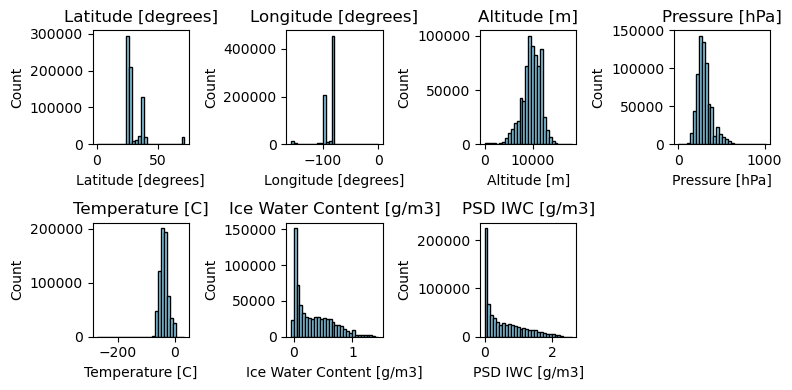

In [9]:
# Plot histograms of environmental variables
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
axes = axes.flatten()

for i, v in enumerate(env_vars):
    axes[i].hist(df_clean[v].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(v)
    axes[i].set_xlabel(v)
    axes[i].set_ylabel('Count')

# Hide any unused subplot (if less than 8 variables)
for j in range(len(env_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


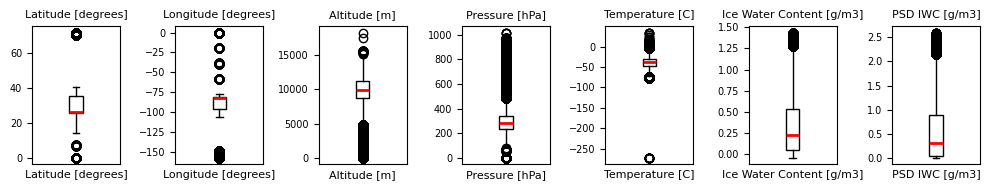

In [10]:
# Plot box and whisker plots of environmental variables
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 2))
axes = axes.flatten()

for i, v in enumerate(env_vars):
    axes[i].boxplot(df_clean[v].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='none', color='black'),
        medianprops=dict(color='red', linewidth=2))
    axes[i].set_title(v, fontsize=8)
    axes[i].set_xlabel(v, fontsize=8)
    axes[i].set_xticks([])
    axes[i].tick_params(axis='both', labelsize=7)

# Hide any unused subplot (if less than 8 variables)
for j in range(len(env_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

In [11]:
# remove outliers (outside of 1/99 percentiles)
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        lower = df_clean[col].quantile(0.01)
        upper = df_clean[col].quantile(0.99)
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_no_outliers = remove_outliers(df_clean, env_vars)

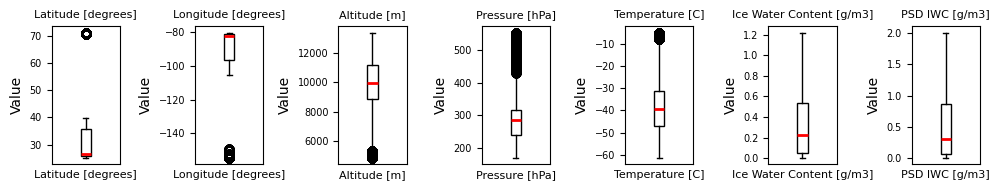

In [12]:
# plot distributions (boxplots) with no outliers
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 2))
axes = axes.flatten()

for i, v in enumerate(env_vars):
    axes[i].boxplot(df_no_outliers[v].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='none', color='black'),
                    medianprops=dict(color='red', linewidth=2))
    axes[i].set_title(v, fontsize=8)
    axes[i].set_xlabel(v, fontsize=8)
    axes[i].set_xticks([])
    axes[i].set_ylabel('Value')
    axes[i].tick_params(axis='both', labelsize=7)

# Hide any unused subplot (if less than 8 variables)
for j in range(len(env_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

In [13]:
features_path = '../data/combined_campaign_features.pth'
features = torch.load(features_path)
features

tensor([[ 4.4832e-01, -5.9601e+00, -8.3811e-01,  ...,  2.2621e+00,
         -1.7905e-02,  1.9393e+00],
        [-2.7233e+00, -3.3840e+00,  3.3221e+00,  ...,  8.3928e+00,
         -2.5675e+00,  3.1161e+00],
        [-3.1331e+00, -3.3424e+00,  1.6675e+00,  ...,  5.6126e+00,
         -6.4340e-01,  6.3281e+00],
        ...,
        [ 2.9130e+00,  5.0640e+00,  2.2687e+00,  ..., -1.1410e+01,
          5.7946e+00, -3.5990e+00],
        [ 2.0987e+00, -1.0195e-02, -2.8865e+00,  ...,  3.4245e+00,
          4.6469e+00,  8.1577e-01],
        [ 1.7661e+00,  1.9101e+00,  2.3922e+00,  ...,  3.3300e+00,
          3.8624e+00, -8.8882e-01]])

In [14]:
features.shape

torch.Size([759632, 384])

In [20]:
# convert features to dataframe
df_features = pd.DataFrame(features.numpy())
# # add index column
# df_features['index'] = df_features.index
df_features.head()


,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.448316,-5.960106,-0.838112,-0.453418,-2.132343,6.470318,-1.265471,-4.202325,1.003302,-7.102476,...,6.098347,-2.406156,0.971895,0.052129,-0.519641,5.803663,1.854075,2.262103,-0.017905,1.939258
1,-2.723319,-3.383989,3.322087,-1.964593,1.170181,-1.587277,-1.669489,-1.712162,-4.909397,-7.378703,...,1.958926,-3.960134,1.251309,-2.670625,5.721043,4.022556,0.077546,8.392792,-2.567546,3.116069
2,-3.133079,-3.342415,1.667470,-6.428302,-0.985107,-0.918643,-1.070312,-3.127928,-4.186565,-7.980657,...,3.094742,-3.879120,2.048366,2.214171,3.990512,8.429094,2.807528,5.612563,-0.643400,6.328050
3,-0.707611,-8.060940,2.255626,-2.558387,-0.604418,3.476718,4.038265,0.817703,1.433286,-5.424162,...,5.998215,-0.531308,-2.083158,-4.157243,2.278965,5.059928,-3.092798,4.273822,2.412360,1.295149
4,-3.445161,-3.887383,-1.849396,-5.607159,-1.629231,-0.640390,-1.566424,-1.776546,-4.051860,-9.042578,...,2.104111,-5.691473,2.078868,-4.374487,5.303424,4.254625,4.370141,6.521928,1.132827,6.860025


Explained variance ratio: [0.05381864 0.03853363 0.03519783 0.03307145 0.03172299 0.02947303
 0.02748487 0.02536115 0.0235999  0.02194519 0.02056572 0.01976991
 0.01810673 0.01785432 0.01738221 0.01625161 0.01590329 0.0153911
 0.01503086 0.01392362 0.01356944 0.01244387 0.0120892  0.01183303
 0.0115254  0.01112683 0.01103558 0.01058586 0.01016894 0.00975538
 0.00934138 0.00923414 0.00915985 0.00866474 0.00830774 0.00804832
 0.00784228 0.00769925 0.00732124 0.00706076 0.00671951 0.00662991
 0.00659205 0.00626142 0.00592464 0.00575555 0.00566905 0.00543196
 0.00528667 0.00508309 0.00500275 0.00488615 0.00470951 0.00461817
 0.00453627 0.00448428 0.00428079 0.00405516 0.00394049 0.00383361
 0.00370389 0.00353575 0.00344599 0.00339797 0.00324357 0.00308525
 0.00307117 0.00301196 0.00295915 0.00287754 0.00280667 0.00274232
 0.00267766 0.00263907 0.00252461 0.00247356 0.00240352 0.00234911
 0.00227809 0.00221214 0.00218983 0.00212285 0.00209185 0.0020446
 0.0020282  0.00194287 0.001912   0.00

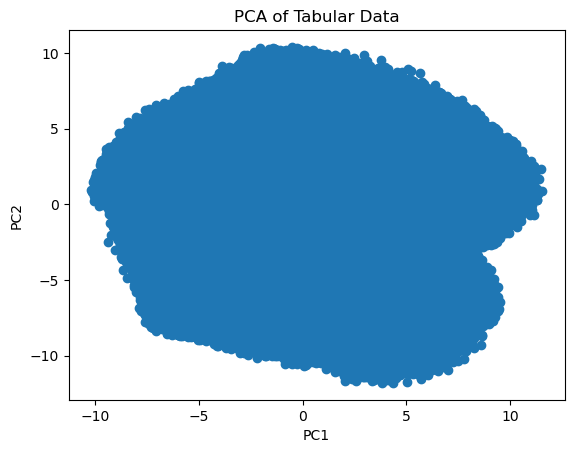

In [32]:
# PCA on embeddings 

# Assume df is your pandas DataFrame with only numeric columns
X = df_features.select_dtypes(include='number').dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=100)  # Change n_components as needed
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# PCA components
print("PCA components:\n", pca.components_)

# If you want to plot the first two principal components:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Tabular Data')
plt.show()

In [33]:
total_explained_variance = pca.explained_variance_ratio_.sum()
print(f"Total explained variance in {pca.n_components} components: {total_explained_variance:.3f}")

Total explained variance in 100 components: 0.884


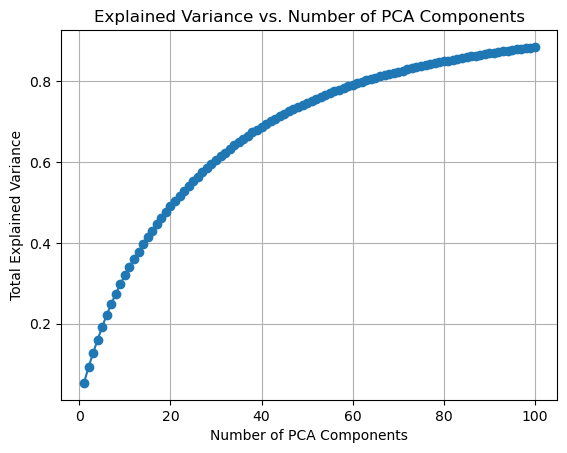

In [34]:
# Compute cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Total Explained Variance')
plt.title('Explained Variance vs. Number of PCA Components')
plt.grid(True)
plt.show()

In [35]:
X_pca.shape

(759632, 100)

60 PC's explain ~80% of variance. Use first 60 PC's

In [36]:
df_features_reduced = pd.DataFrame(X_pca[:, :60])
df_features_reduced.shape

(759632, 60)

In [58]:
# Combine env with embeddings data assuming indices are matched 
df_combined = df_no_outliers.merge(df_features_reduced, left_index=True, right_index=True)
df_combined.head()

,index,filename,date,Frame Width [pixels],Frame Height [pixels],Particle Width [micrometers],Particle Height [micrometers],Cutoff [%],Aggregate [%],Budding [%],...,50,51,52,53,54,55,56,57,58,59
0,271,2000_0309_193624_939_28.png,2000-03-09 19:36:24,106.0,140.0,174.632,248.420,0.00,12.598,78.102,...,0.126740,1.103258,0.982616,1.537337,-0.604096,0.906554,-0.232661,0.293193,0.313158,0.938997
1,6544,2000_0312_235820_253_18.png,2000-03-12 23:58:20,205.0,228.0,405.842,475.640,0.00,0.030,0.000,...,0.318552,0.118887,-0.332140,-1.340974,-0.881682,-0.059234,-0.769156,-1.093735,0.447645,-0.701690
2,14959,2000_0313_195433_318_7.png,2000-03-13 19:54:33,232.0,202.0,411.359,441.451,0.00,0.000,0.000,...,0.984527,-0.900216,0.691459,0.692161,-0.836249,0.236463,-0.211033,-0.488124,-0.805993,-2.279155
3,561,2000_0309_200021_189_43.png,2000-03-09 20:00:21,88.0,97.0,137.014,171.312,0.00,0.000,0.002,...,-0.438841,1.501032,-0.253651,-0.452917,0.218427,-0.509052,0.240443,-0.508067,-0.331342,1.352486
4,18005,2000_0313_203846_761_13.png,2000-03-13 20:38:46,275.0,323.0,546.286,653.653,2.26,2.794,0.231,...,1.578193,-1.967932,0.857695,1.151728,-1.921982,0.396195,-0.253305,-0.643003,-1.135676,-4.030652


In [59]:
df_combined.shape

(578291, 108)

In [62]:
df_no_outliers.columns

Index(['index', 'filename', 'date', 'Frame Width [pixels]',
       'Frame Height [pixels]', 'Particle Width [micrometers]',
       'Particle Height [micrometers]', 'Cutoff [%]', 'Aggregate [%]',
       'Budding [%]', 'Bullet Rosette [%]', 'Column [%]',
       'Compact Irregular [%]', 'Fragment [%]', 'Planar Polycrystal [%]',
       'Rimed [%]', 'Sphere [%]', 'Classification', 'Blur', 'Contours [#]',
       'Edges', 'Std', 'Contour Area [pixels]', 'Contrast', 'Circularity',
       'Solidity', 'Complexity', 'Equivalent Diameter', 'Convex Perimeter',
       'Hull Area', 'Perimeter', 'Aspect Ratio', 'Extreme Points',
       'Area Ratio', 'Roundness', 'Perimeter-Area Ratio', 'Latitude [degrees]',
       'Longitude [degrees]', 'Altitude [m]', 'Pressure [hPa]',
       'Temperature [C]', 'Ice Water Content [g/m3]', 'PSD IWC [g/m3]',
       'concentration ratio', 'area ratio', 'mass ratio', 'Campaign',
       'Perimeter [pixels]'],
      dtype='object')

In [74]:
list(df_combined.columns)

['index',
 'filename',
 'date',
 'Frame Width [pixels]',
 'Frame Height [pixels]',
 'Particle Width [micrometers]',
 'Particle Height [micrometers]',
 'Cutoff [%]',
 'Aggregate [%]',
 'Budding [%]',
 'Bullet Rosette [%]',
 'Column [%]',
 'Compact Irregular [%]',
 'Fragment [%]',
 'Planar Polycrystal [%]',
 'Rimed [%]',
 'Sphere [%]',
 'Classification',
 'Blur',
 'Contours [#]',
 'Edges',
 'Std',
 'Contour Area [pixels]',
 'Contrast',
 'Circularity',
 'Solidity',
 'Complexity',
 'Equivalent Diameter',
 'Convex Perimeter',
 'Hull Area',
 'Perimeter',
 'Aspect Ratio',
 'Extreme Points',
 'Area Ratio',
 'Roundness',
 'Perimeter-Area Ratio',
 'Latitude [degrees]',
 'Longitude [degrees]',
 'Altitude [m]',
 'Pressure [hPa]',
 'Temperature [C]',
 'Ice Water Content [g/m3]',
 'PSD IWC [g/m3]',
 'concentration ratio',
 'area ratio',
 'mass ratio',
 'Campaign',
 'Perimeter [pixels]',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,

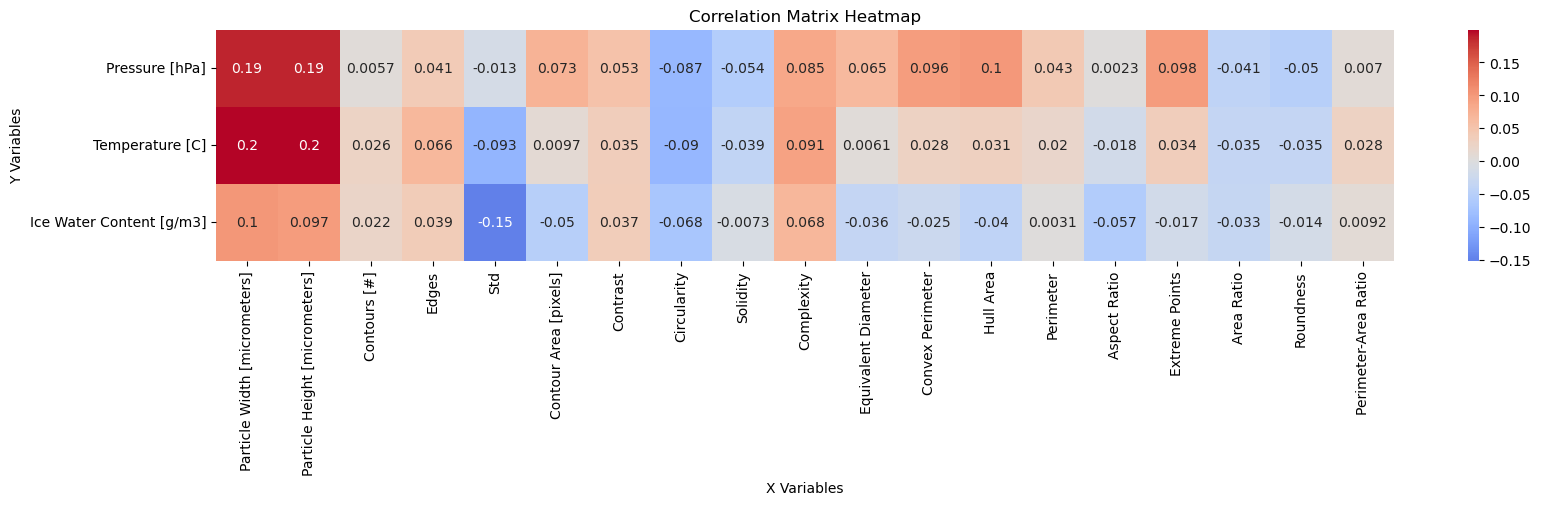

In [90]:
# Correlation matrix: extracted 2d features vs. env vars 
geometric_features = ['Particle Width [micrometers]',
       'Particle Height [micrometers]', 'Contours [#]',
       'Edges', 'Std', 'Contour Area [pixels]', 'Contrast', 'Circularity',
       'Solidity', 'Complexity', 'Equivalent Diameter', 'Convex Perimeter',
       'Hull Area', 'Perimeter', 'Aspect Ratio', 'Extreme Points',
       'Area Ratio', 'Roundness', 'Perimeter-Area Ratio']
env_vars = ['Pressure [hPa]', 'Temperature [C]', 'Ice Water Content [g/m3]']

x_vars = geometric_features
y_vars = env_vars

# Compute correlation matrix between x_vars and y_vars
corr_matrix = df_combined[x_vars].corrwith(df_combined[y_vars], axis=0).to_frame().T if len(y_vars) == 1 else df_combined[x_vars].corrwith(df_combined[y_vars[0]], axis=0).to_frame().T

# For a full matrix (all pairwise correlations):
corr_matrix = df_combined[x_vars].corrwith(df_combined[y_vars[0]], axis=0).to_frame().T
for y in y_vars[1:]:
    corr_matrix = pd.concat([corr_matrix, df_combined[x_vars].corrwith(df_combined[y], axis=0).to_frame().T])
corr_matrix.index = y_vars

# Plot heatmap
plt.figure(figsize=(len(x_vars), len(y_vars)))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=x_vars, yticklabels=y_vars, center=0)
plt.xlabel('X Variables')
plt.ylabel('Y Variables')
plt.title('Correlation Matrix Heatmap')
plt.show()

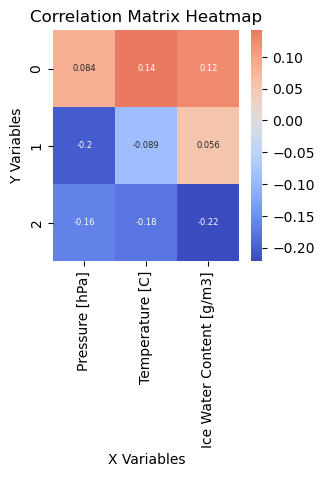

In [91]:
# Correlation matrix: embeddings PCs vs. env vars 
env_vars = ['Pressure [hPa]', 'Temperature [C]', 'Ice Water Content [g/m3]']
x_vars = env_vars
n_embeddings = len(x_vars)
y_vars = list(range(0, n_embeddings))

# Compute correlation matrix between x_vars and y_vars
corr_matrix = df_combined[x_vars].corrwith(df_combined[y_vars], axis=0).to_frame().T if len(y_vars) == 1 else df_combined[x_vars].corrwith(df_combined[y_vars[0]], axis=0).to_frame().T

# For a full matrix (all pairwise correlations):
corr_matrix = df_combined[x_vars].corrwith(df_combined[y_vars[0]], axis=0).to_frame().T
for y in y_vars[1:]:
    corr_matrix = pd.concat([corr_matrix, df_combined[x_vars].corrwith(df_combined[y], axis=0).to_frame().T])
corr_matrix.index = y_vars

# Plot heatmap
plt.figure(figsize=(len(x_vars), len(y_vars)))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=x_vars, yticklabels=y_vars, annot_kws={"size": 6}, center=0)
plt.xlabel('X Variables')
plt.ylabel('Y Variables')
plt.title('Correlation Matrix Heatmap')
plt.show()

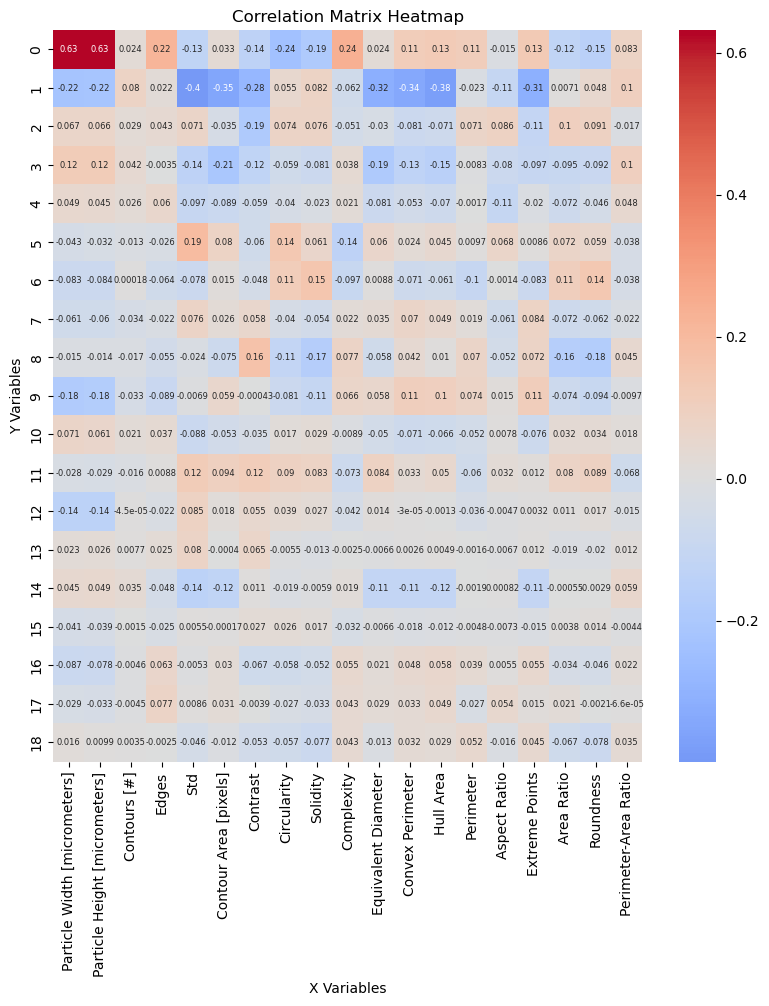

In [92]:
# Correlation matrix: extracted 2d features vs. embeddings PCs
geometric_features = ['Particle Width [micrometers]',
       'Particle Height [micrometers]', 'Contours [#]',
       'Edges', 'Std', 'Contour Area [pixels]', 'Contrast', 'Circularity',
       'Solidity', 'Complexity', 'Equivalent Diameter', 'Convex Perimeter',
       'Hull Area', 'Perimeter', 'Aspect Ratio', 'Extreme Points',
       'Area Ratio', 'Roundness', 'Perimeter-Area Ratio']
x_vars = geometric_features
n_embeddings = len(geometric_features)
y_vars = list(range(0, n_embeddings))

# Compute correlation matrix between x_vars and y_vars
corr_matrix = df_combined[x_vars].corrwith(df_combined[y_vars], axis=0).to_frame().T if len(y_vars) == 1 else df_combined[x_vars].corrwith(df_combined[y_vars[0]], axis=0).to_frame().T

# For a full matrix (all pairwise correlations):
corr_matrix = df_combined[x_vars].corrwith(df_combined[y_vars[0]], axis=0).to_frame().T
for y in y_vars[1:]:
    corr_matrix = pd.concat([corr_matrix, df_combined[x_vars].corrwith(df_combined[y], axis=0).to_frame().T])
corr_matrix.index = y_vars

# Plot heatmap
plt.figure(figsize=(len(x_vars)/2, len(y_vars)/2))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=x_vars, yticklabels=y_vars, annot_kws={"size": 6}, center=0)
plt.xlabel('X Variables')
plt.ylabel('Y Variables')
plt.title('Correlation Matrix Heatmap')
plt.show()

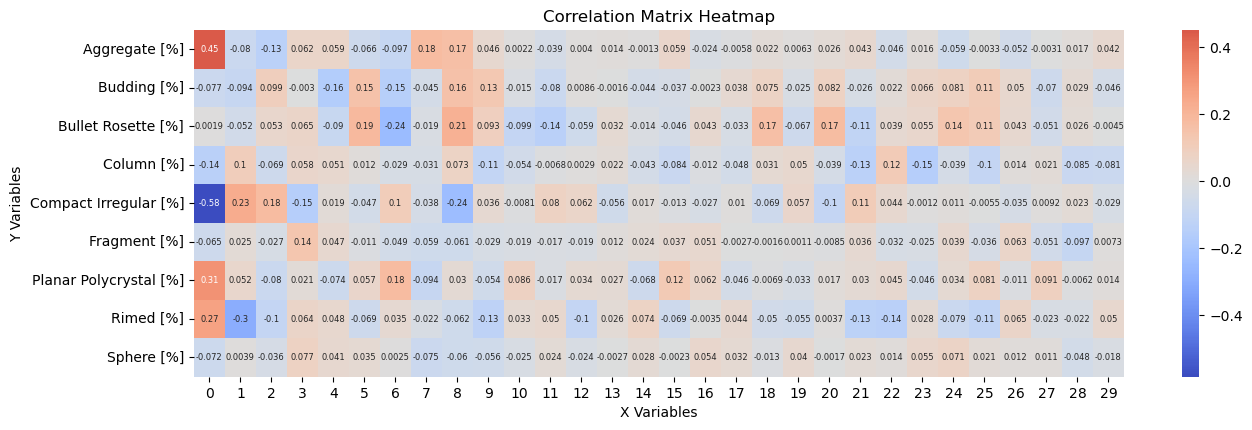

In [93]:
# Correlation matrix: embedding PC's vs. classification probs 
class_probs = ['Aggregate [%]', 'Budding [%]', 'Bullet Rosette [%]', 'Column [%]', 'Compact Irregular [%]', 'Fragment [%]', 'Planar Polycrystal [%]', 'Rimed [%]', 'Sphere [%]']
y_vars = class_probs
n_embeddings = 30 #len(x_vars)
x_vars = list(range(0, n_embeddings))

# Compute correlation matrix between x_vars and y_vars
corr_matrix = df_combined[x_vars].corrwith(df_combined[y_vars], axis=0).to_frame().T if len(y_vars) == 1 else df_combined[x_vars].corrwith(df_combined[y_vars[0]], axis=0).to_frame().T

# For a full matrix (all pairwise correlations):
corr_matrix = df_combined[x_vars].corrwith(df_combined[y_vars[0]], axis=0).to_frame().T
for y in y_vars[1:]:
    corr_matrix = pd.concat([corr_matrix, df_combined[x_vars].corrwith(df_combined[y], axis=0).to_frame().T])
corr_matrix.index = y_vars

# Plot heatmap
plt.figure(figsize=(len(x_vars)/2, len(y_vars)/2))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=x_vars, yticklabels=y_vars, annot_kws={"size": 6}, center=0)
plt.xlabel('X Variables')
plt.ylabel('Y Variables')
plt.title('Correlation Matrix Heatmap')
plt.show()

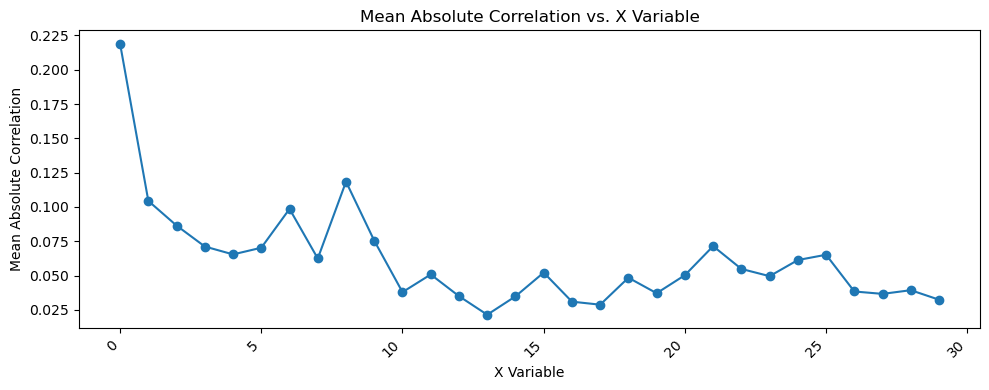

In [94]:
# calculate average magnitude of correlation coefficient as a function of embedding PC
# Calculate mean absolute correlation for each X variable
mean_abs_corr = corr_matrix.abs().mean(axis=0)
plt.figure(figsize=(10, 4))
plt.plot(mean_abs_corr.index, mean_abs_corr.values, marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('X Variable')
plt.ylabel('Mean Absolute Correlation')
plt.title('Mean Absolute Correlation vs. X Variable')
plt.tight_layout()
plt.show()